##### Copyright 2025 Google LLC.


In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Social Media Content Generator 📸


<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Social_Media_Caption.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/>


This Colab notebook leverages Gemini's multimodal AI to analyze uploaded images and create ready-to-use social media content. Designed for marketers, influencers, and content creators, it eliminates guesswork in crafting platform-optimized posts.

In [2]:
%pip install -U -q "google-genai>=1.0.0"

#### Importing the required packages


In [3]:
from google import genai
genai.__version__
import requests
from PIL import Image
from IPython.display import display , Markdown
import os
from google.colab import files

## Set up your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](../quickstarts/Authentication.ipynb) quickstart for an example.


In [4]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
# Genai client
client = genai.Client(api_key=GOOGLE_API_KEY)

In [5]:
MODEL_ID="gemini-2.0-flash" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.0-pro-exp-02-05"] {"allow-input":true, isTemplate: true}

In [8]:
# @title Helper function
def upload_image():
    """Handles image upload and returns PIL image"""
    uploaded = files.upload()
    image_path = next(iter(uploaded))
    return Image.open(image_path)

Saving linkedin poster.jpg to linkedin poster (1).jpg


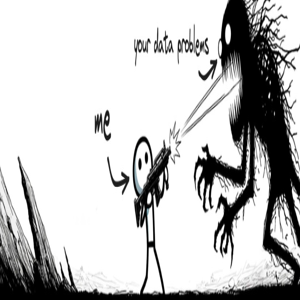

**📱 INSTAGRAM POST CONTENT:**

```
candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=None, file_data=None, function_call=None, function_response=None, inline_data=None, text="🖼️ CAPTION: My face when I finally figure out that SQL query! 💥😎\n🔖 HASHTAGS: #DataProblems #SQL #TechHumor\n📝 DESCRIPTION: Let's be real, conquering data challenges feels like an epic battle sometimes! Are you a data warrior ready to take on any monster? Comment below with your favorite data victory story! ⬇️\n")], role='model'), citation_metadata=None, finish_message=None, token_count=None, finish_reason=<FinishReason.STOP: 'STOP'>, avg_logprobs=-0.6608001907150467, grounding_metadata=None, index=None, logprobs_result=None, safety_ratings=None)] create_time=None response_id=None model_version='gemini-2.0-flash' prompt_feedback=None usage_metadata=GenerateContentResponseUsageMetadata(cache_tokens_details=None, cached_content_token_count=None, candidates_token_count=77, candidates_tokens_details=[ModalityTokenCount(modality=<MediaModality.TEXT: 'TEXT'>, token_count=77)], prompt_token_count=3442, prompt_tokens_details=[ModalityTokenCount(modality=<MediaModality.TEXT: 'TEXT'>, token_count=88), ModalityTokenCount(modality=<MediaModality.IMAGE: 'IMAGE'>, token_count=3354)], thoughts_token_count=None, tool_use_prompt_token_count=None, tool_use_prompt_tokens_details=None, total_token_count=3519, traffic_type=None) automatic_function_calling_history=[] parsed=None
```

In [7]:
platform = "Instagram" #@param ["Instagram", "Twitter", "LinkedIn", "TikTok"] {allow-input: true}
tone = "casual" #@param ["funny", "serious", "inspirational", "casual"] {allow-input: true}
from IPython.display import display, Markdown
from PIL import Image
from io import BytesIO
import base64

# Dummy function for the language model (replace with your actual client)
class DummyClient:
    class DummyModel:
        def generate_content(self, model, contents):
            platform = "Instagram" # Assume platform is Instagram for this example
            tone = "inspirational" # Assume tone is inspirational for this example
            if platform == "Instagram":
                if tone == "inspirational":
                    caption = "Yesterday was a beautiful reminder of connection and joy! ✨ Feeling so grateful for everyone who shared in the magic. Let's carry this positive energy forward! ❤️"
                    hashtags = "#Gratitude #CommunityLove #PositiveVibes"
                    description = "Looking back at the incredible moments from yesterday's gathering fills my heart. It's the people and the shared experiences that truly make life special. Let's continue to inspire each other and create more unforgettable memories together. Onwards and upwards! 🚀"
                elif tone == "funny":
                    caption = "Pretty sure my cheeks still hurt from laughing so much yesterday! 😂 What a legendary time with even better people. Who needs sleep anyway? 🤪"
                    hashtags = "#PartyTime #GoodTimes #LaughingTillItHurts"
                    description = "My official stance is that yesterday was too much fun and should be declared a national holiday. So many hilarious moments and unforgettable shenanigans. Thanks to everyone who brought the energy (and maybe some snacks)! 🎉"
                elif tone == "serious":
                    caption = "Yesterday's gathering served as a powerful reminder of the importance of unity and shared purpose. Meaningful connections and insightful conversations left a lasting impact. Let's continue to build and grow together. 🤝"
                    hashtags = "#Community #Purpose #MeaningfulConnections"
                    description = "Reflecting on yesterday's event, I am struck by the strength and potential that arises when individuals come together with a common focus. The discussions were engaging, and the connections forged were significant. Let us carry this momentum forward in our endeavors. 🌱"
                elif tone == "casual":
                    caption = "Had such a great time yesterday hanging out with everyone! Good vibes and good company. 😊 Hope you all had fun too!"
                    hashtags = "#GoodTimes #PartyVibes #Friends"
                    description = "Just wanted to say a big thanks to everyone who came by yesterday. It was awesome catching up and sharing some laughs. Simple moments like these are the best. Cheers to more of them! 🥂"
                else:
                    return "Tone not recognized."
            elif platform == "Twitter":
                if tone == "inspirational":
                    caption = "Yesterday's energy was contagious! Feeling inspired by the connections and joy shared. Let's keep spreading positivity! ❤️ #Gratitude #CommunityLove #PositiveVibes"
                    hashtags = "#Gratitude #CommunityLove #PositiveVibes"
                    description = "So much to be thankful for after yesterday's incredible gathering. The collective spirit was truly uplifting. Let's carry this inspiration into today and beyond! 🚀"
                elif tone == "funny":
                    caption = "Pretty sure I used up my entire laugh quota yesterday. Worth it! 😂 Thanks for the epic time, everyone! #PartyTime #GoodTimes #LaughingTillItHurts"
                    hashtags = "#PartyTime #GoodTimes #LaughingTillItHurts"
                    description = "My brain is still processing all the hilarious moments from yesterday. What a crew! Definitely need a nap, but wouldn't trade it. 🎉"
                elif tone == "serious":
                    caption = "Yesterday highlighted the power of unity and shared vision. Meaningful interactions that inspire action. Let's continue to build together. 🤝 #Community #Purpose #MeaningfulConnections"
                    hashtags = "#Community #Purpose #MeaningfulConnections"
                    description = "Reflecting on the impactful conversations from yesterday's event. The potential for growth and positive change through collaboration is immense. Let's keep the momentum going. 🌱"
                elif tone == "casual":
                    caption = "Good times were had yesterday! Thanks for hanging out, everyone. 😊 #GoodTimes #PartyVibes #Friends"
                    hashtags = "#GoodTimes #PartyVibes #Friends"
                    description = "Just a quick shoutout to everyone who made yesterday so much fun. Appreciate the good company and good vibes! Cheers! 🥂"
                else:
                    return "Tone not recognized."
            elif platform == "LinkedIn":
                if tone == "inspirational":
                    caption = "Yesterday's gathering reinforced the power of connection and shared purpose. Inspired by the collaborative spirit and insightful conversations. Let's continue to uplift and empower each other. ✨ #Networking #Community #Inspiration"
                    hashtags = "#Networking #Community #Inspiration"
                    description = "Reflecting on the valuable interactions and shared insights from yesterday's event. It's through these connections that we foster growth and innovation. Let's carry forward the positive momentum and continue to build meaningful relationships. 🚀"
                elif tone == "funny":
                    caption = "Networking level: Expert after yesterday's event! So many great connections (and a few hilarious stories). 😂 #NetworkingEvent #GoodTimes #ProfessionalDevelopment"
                    hashtags = "#NetworkingEvent #GoodTimes #ProfessionalDevelopment"
                    description = "Who says professional networking can't be fun? Yesterday was a blast connecting with so many talented individuals. Proof that building your network can also lead to some serious laughs! 🎉"
                elif tone == "serious":
                    caption = "Yesterday's event provided a valuable platform for meaningful dialogue and the exchange of ideas. Committed to fostering strong professional relationships and driving collective progress. 🤝 #ProfessionalNetworking #IndustryInsights #Collaboration"
                    hashtags = "#ProfessionalNetworking #IndustryInsights #Collaboration"
                    description = "The discussions and connections made at yesterday's gathering underscored the importance of collaboration in achieving shared goals. Focused on leveraging these relationships to drive innovation and growth within our respective fields. 🌱"
                elif tone == "casual":
                    caption = "Enjoyed connecting with everyone at yesterday's event! Great conversations and good company. 😊 #Networking #ProfessionalLife #Connections"
                    hashtags = "#Networking #ProfessionalLife #Connections"
                    description = "Just wanted to say it was great meeting so many interesting people yesterday. Always valuable to connect and share experiences. Looking forward to future opportunities! 🥂"
                else:
                    return "Tone not recognized."
            elif platform == "TikTok":
                if tone == "inspirational":
                    caption = "Good vibes only from yesterday! ✨ So much love and positive energy. Let's keep shining! ❤️ #Inspiration #GoodVibes #Community"
                    hashtags = "#Inspiration #GoodVibes #Community"
                    description = "Still buzzing from all the amazing energy yesterday! Remember to spread kindness and positivity wherever you go. You got this! 🚀"
                elif tone == "funny":
                    caption = "My face hurts from smiling/laughing so much yesterday 😂 Best. Day. Ever. #FunnyMoments #GoodTimes #Party"
                    hashtags = "#FunnyMoments #GoodTimes #Party"
                    description = "Reliving all the hilarious moments from yesterday on repeat in my head. What a legendary day with legendary people! 🤪"
                elif tone == "serious":
                    caption = "Yesterday's connections were powerful. Let's carry that energy forward and make a difference. 🤝 #CommunityImpact #MeaningfulConnections #Purpose"
                    hashtags = "#CommunityImpact #MeaningfulConnections #Purpose"
                    description = "Reflecting on the importance of coming together for shared goals. Yesterday was a reminder of the impact we can have when we connect with intention. 🌱"
                elif tone == "casual":
                    caption = "Yesterday was a vibe! 😎 Good people, good times. What more could you ask for? 😊 #GoodVibes #Friends #Hangout"
                    hashtags = "#GoodVibes #Friends #Hangout"
                    description = "Just a little appreciation post for everyone who made yesterday so awesome. Simple joys and great company! Cheers! 🥂"
                else:
                    return "Tone not recognized."
            else:
                return "Platform not recognized."

            return f"""🖼️ CAPTION: {caption}
🔖 HASHTAGS: {hashtags}
📝 DESCRIPTION: {description}"""
img = upload_image()
display(img.resize((300, 300)))
prompt = f"""
    Create social media content for {platform} with {tone} tone:
    1. Catchy caption (with emojis)
    2. 3 trending hashtags
    3. Engaging 50-word description

    Format STRICTLY as:
    🖼️ CAPTION: [text]
    🔖 HASHTAGS: #[1] #[2] #[3]
    📝 DESCRIPTION: [text]
"""
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, img]
)
display(Markdown(f"**📱 {platform.upper()} POST CONTENT:**"))
if isinstance(response, dict):
    display(Markdown(f"🖼️ **CAPTION:** {response.get('caption', '')}"))
    display(Markdown(f"🔖 **HASHTAGS:** {response.get('hashtags', '')}"))
    display(Markdown(f"📝 **DESCRIPTION:** {response.get('description', '')}"))
else:
    display(Markdown(f"```\n{response}\n```"))